<a href="https://colab.research.google.com/github/wurabucknor/ML/blob/main/ML_Hands_On/Copy_of_Drug_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('drug200.csv')

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.shape

(200, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


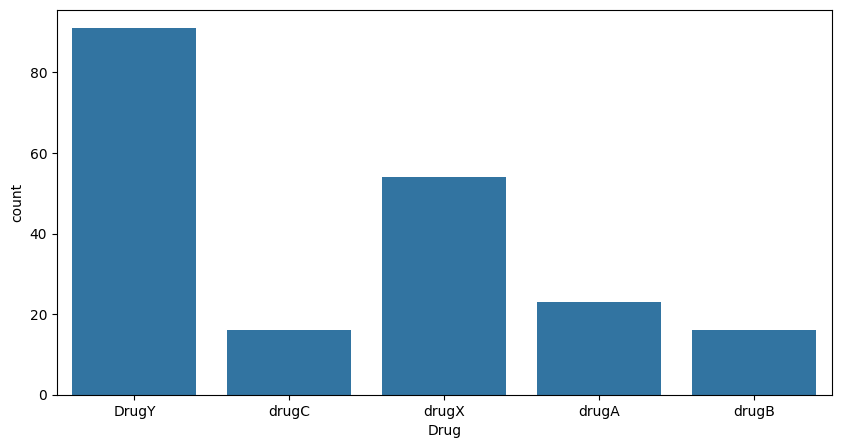

In [ ]:
# prompt: how to visualise column Drug

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x='Drug',data=df)
plt.show()


In [ ]:
# prompt: how do l view the data variation in column Drug

df['Drug'].value_counts()


Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
count_nan=df.isnull().sum()
count_nan

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
# prompt: how to remove null values

df.dropna(inplace=True)


In [ ]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [ ]:
df[['Drug','BP','Sex','Cholesterol']].value_counts()

Drug   BP      Sex  Cholesterol
DrugY  HIGH    F    NORMAL         14
drugX  NORMAL  F    HIGH           12
DrugY  NORMAL  M    HIGH           11
drugX  LOW     M    NORMAL         10
DrugY  HIGH    F    HIGH            9
       LOW     M    NORMAL          9
drugC  LOW     M    HIGH            9
drugX  NORMAL  M    NORMAL          9
DrugY  HIGH    M    NORMAL          9
       LOW     M    HIGH            8
drugX  NORMAL  M    HIGH            8
drugA  HIGH    M    NORMAL          8
drugX  LOW     F    NORMAL          8
drugC  LOW     F    HIGH            7
drugX  NORMAL  F    NORMAL          7
DrugY  LOW     F    HIGH            7
       NORMAL  F    HIGH            6
       HIGH    M    HIGH            6
drugB  HIGH    M    HIGH            6
DrugY  LOW     F    NORMAL          6
drugA  HIGH    F    HIGH            6
               M    HIGH            6
DrugY  NORMAL  F    NORMAL          5
drugB  HIGH    M    NORMAL          4
               F    NORMAL          4
drugA  HIGH    F  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df['Drug']=df['Drug'].replace(['drugA','drugB','drugC','drugX','DrugY'],[0,1,2,3,4])

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,4
1,47,M,LOW,HIGH,13.093,2
2,47,M,LOW,HIGH,10.114,2
3,28,F,NORMAL,HIGH,7.798,3
4,61,F,LOW,HIGH,18.043,4
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,2
196,16,M,LOW,HIGH,12.006,2
197,52,M,NORMAL,HIGH,9.894,3
198,23,M,NORMAL,NORMAL,14.020,3


In [ ]:
df['Sex']=df['Sex'].replace(['F','M'],[0,1])

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,4
1,47,1,LOW,HIGH,13.093,2
2,47,1,LOW,HIGH,10.114,2
3,28,0,NORMAL,HIGH,7.798,3
4,61,0,LOW,HIGH,18.043,4
...,...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567,2
196,16,1,LOW,HIGH,12.006,2
197,52,1,NORMAL,HIGH,9.894,3
198,23,1,NORMAL,NORMAL,14.020,3


In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,4
1,47,1,LOW,HIGH,13.093,2
2,47,1,LOW,HIGH,10.114,2
3,28,0,NORMAL,HIGH,7.798,3
4,61,0,LOW,HIGH,18.043,4
...,...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567,2
196,16,1,LOW,HIGH,12.006,2
197,52,1,NORMAL,HIGH,9.894,3
198,23,1,NORMAL,NORMAL,14.020,3


In [ ]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [ ]:
df['Cholesterol']=df['Cholesterol'].replace(['NORMAL','HIGH'],['0','1'])

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,1,25.355,4
1,47,1,LOW,1,13.093,2
2,47,1,LOW,1,10.114,2
3,28,0,NORMAL,1,7.798,3
4,61,0,LOW,1,18.043,4
...,...,...,...,...,...,...
195,56,0,LOW,1,11.567,2
196,16,1,LOW,1,12.006,2
197,52,1,NORMAL,1,9.894,3
198,23,1,NORMAL,0,14.020,3


In [ ]:
df['BP']=df['BP'].replace(['LOW','NORMAL','HIGH'],[0,1,2])

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4
...,...,...,...,...,...,...
195,56,0,0,1,11.567,2
196,16,1,0,1,12.006,2
197,52,1,1,1,9.894,3
198,23,1,1,0,14.020,3


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


In [ ]:
df['Cholesterol'].value_counts()

Cholesterol
1    103
0     97
Name: count, dtype: int64

In [ ]:
df.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol     object
Na_to_K        float64
Drug             int64
dtype: object

In [ ]:
# prompt: convert column Cholesterol from object to int64

df['Cholesterol'] = df['Cholesterol'].astype('int64')


In [ ]:
df.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

<Axes: >

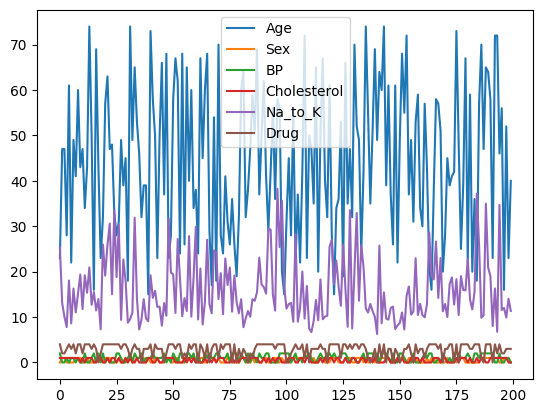

In [ ]:
df.plot()

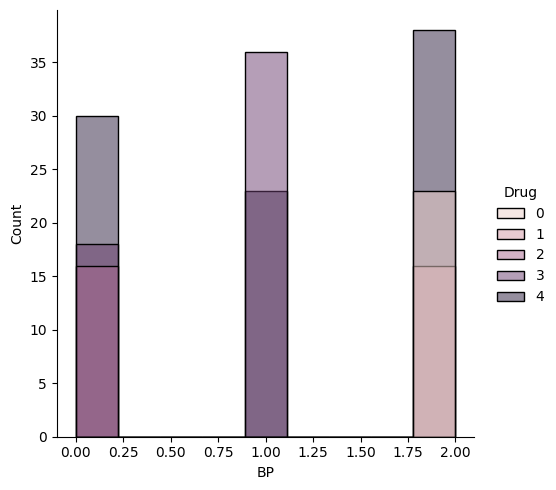

In [ ]:
sns.displot(df,x="BP", hue="Drug")

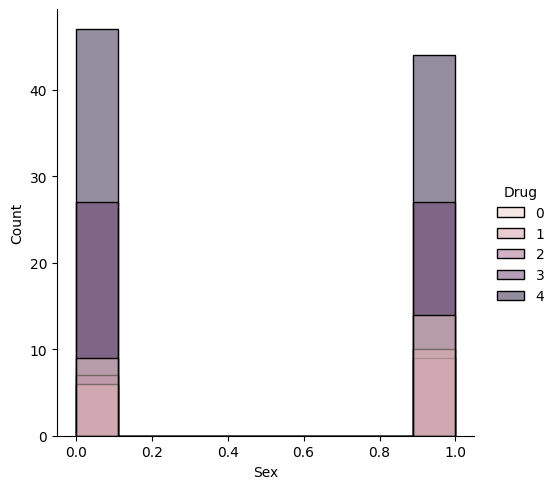

In [ ]:
sns.displot(df,x="Sex",hue="Drug")

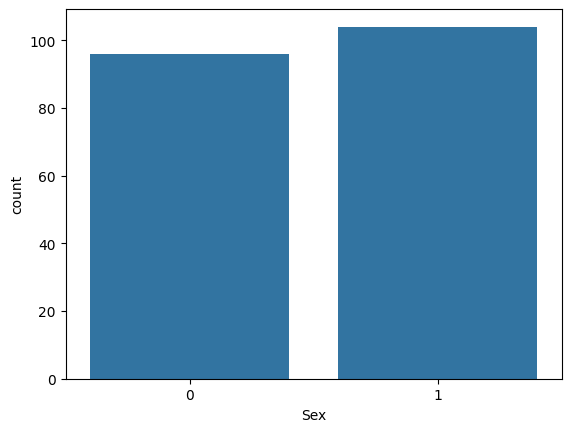

In [ ]:
# prompt: code to show sex distribution within the data

import matplotlib.pyplot as plt
sns.countplot(x='Sex', data=df)
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score


In [ ]:
x=df[['BP','Sex','Cholesterol','Na_to_K','Age']].values
y=df['Drug'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state = 42)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_train_pred = dtc.predict(x_train)
y_test_pred= dtc.predict(x_test)
dtc.score(x_train,y_train)


1.0

In [ ]:
dtc.score(x_test,y_test)

1.0

In [ ]:
#test your model
Xnew = np.array([[40,0,0,1,25.35]])
ynew = dtc.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0],ynew[0]))


X=[40.    0.    0.    1.   25.35], Predicted=0


In [ ]:
# prompt: how to pickle dtc

import pickle

# Save the model to a file
with open('dtc_model.pkl', 'wb') as f:
    pickle.dump(dtc, f)

# Load the model from the file
with open('dtc_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use the loaded model to make predictions
y_pred = loaded_model.predict(x_test)



In [ ]:
with open('dtc_model.pkl', 'wb') as f:
    pickle.dump(dtc, f)

In [ ]:
#!pip install pycaret